Initial analysis of the dataset

URL: https://www.kaggle.com/datasets/shivachandel/kc-house-data


In [21]:
import pandas as pd
import numpy as np
import xgboost as xgb
import time

In [22]:
house = pd.read_csv("data/kc_house_data.csv")

In [23]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# house.info()

In [24]:
X = house.drop(["id", "zipcode", "price", "date"], axis=1)


In [25]:
y = house["price"]

In [26]:
X.shape

(21613, 17)

In [27]:
y.shape

(21613,)

In [35]:
#preparing dataset to test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
#creating the model and fitting it
xg_model = xgb.XGBRegressor(random_state=123, max_depth=7, n_estimators=10)

xg_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [36]:
#prediction

y_pred = xg_model.predict(X_test)

In [38]:
#calculating the coefficient of determination

r_2 = xg_model.score(X_test,y_test)

print(f"R2 equals: {r_2}.")

R2 equals: 0.8327199381708102.


In [47]:
#calculating root mean squared error - RMSE and mean absolute error - MAE

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_squared_error(y_test, y_pred)

print(f"Root mean squared error amounts to: {rmse},\nmean absolute error amounts to: {mae}.")


Root mean squared error amounts to: 155401.5518952614,
mean absolute error amounts to: 24149642331.45562.


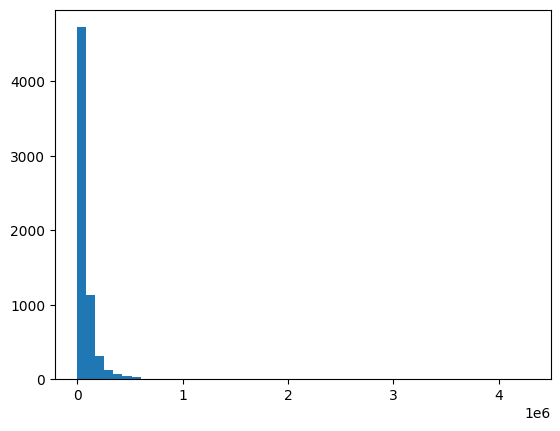

In [48]:
import matplotlib.pyplot as plt

plt.hist(np.abs(y_test - y_pred), bins=50);

In [57]:
import graphviz

<Axes: >

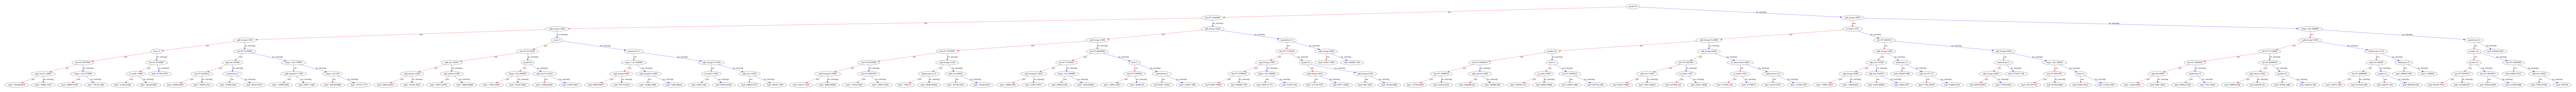

In [58]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = (80,50)

xgb.plot_tree(xg_model, num_trees=0)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

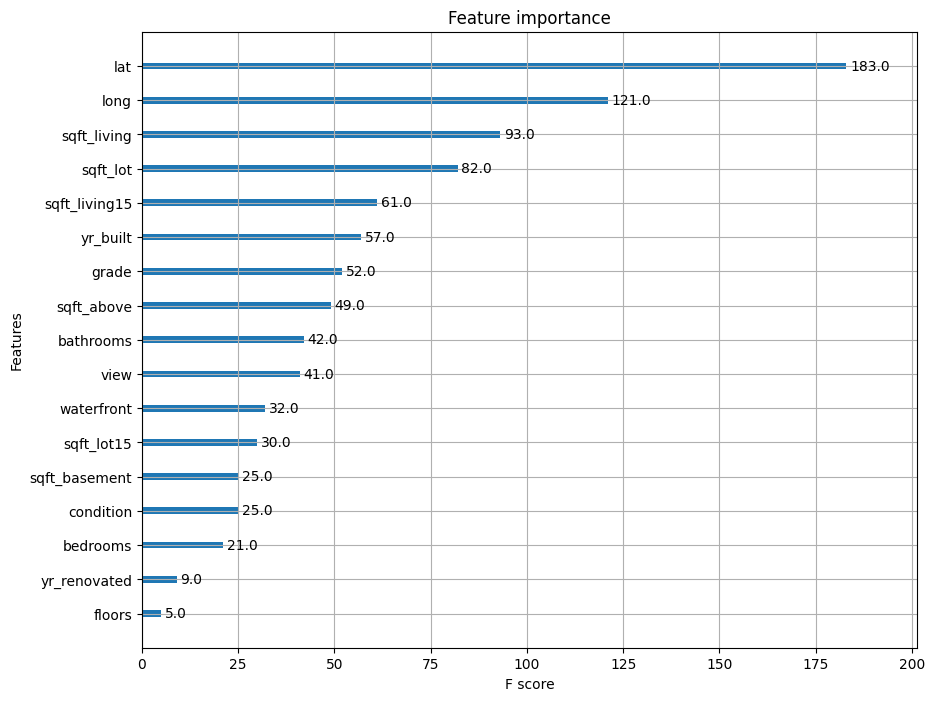

In [61]:
from matplotlib.pylab import rcParams
##set up the parameters
rcParams['figure.figsize'] = 10, 8

xgb.plot_importance(xg_model)

In [65]:
# xgBoost with linear regression

xg_model_lin = xgb.XGBRegressor(booster="gblinear", n_estimators=10, seed = 123)

xg_model_lin.fit(X_train, y_train)

y_pred_lin = xg_model_lin.predict(X_test)

In [68]:
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print(f"Root mean squared error amounts to: {rmse_lin}.")

Root mean squared error amounts to: 261445.06827876245.


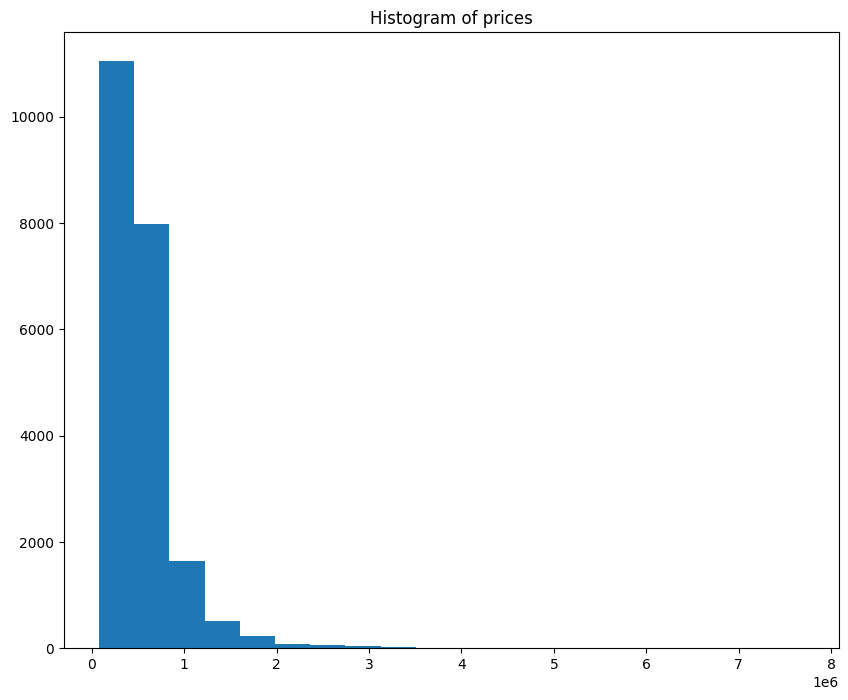

In [72]:
#Price distribution
#visualisation


plt.hist(house['price'], bins=20)
plt.title("Histogram of prices")
plt.show()

#we can easily see that the below distribution does not follow a normal distribution.



In [76]:
# confirming the above statement using Shapiro-Wilk and Anderson tests

from scipy.stats import shapiro, anderson

# Shapiro-Wilk test
stat, p_value = shapiro(house["price"])

if p_value < 0.05:
    print(f'Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}. We do reject null hipothesis about normal distribution. In other words the considered distribution does not follow normal distribution.')
else:
    print(f'Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}. The considered distribution follows the normal distribution.')

# Anderson-Darling test
result = anderson(house["price"])
print(f'Anderson-Darling Test: Statistic={result.statistic}, Critical Values={result.critical_values}')

print("The Statistic in Anderson test significantly outbalances each of the critical values, which indicates the strong deviation from the assumed normal distribution.")


Shapiro-Wilk Test: Statistic=0.7120144367218018, p-value=0.0. We do reject null hipothesis about normal distribution. In other words the considered distribution does not follow normal distribution.
Anderson-Darling Test: Statistic=1192.0875632728275, Critical Values=[0.576 0.656 0.787 0.918 1.092]
The statistic in Anderson test significantly outbalances each of the critical values, which indicates the strong deviation from the assumed normal distribution.


In [78]:
# log of houses' prices

house["log_price"] = np.log10(house["price"])

house.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,5.346157
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,5.730782
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,5.255273
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,5.781037
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,5.707570


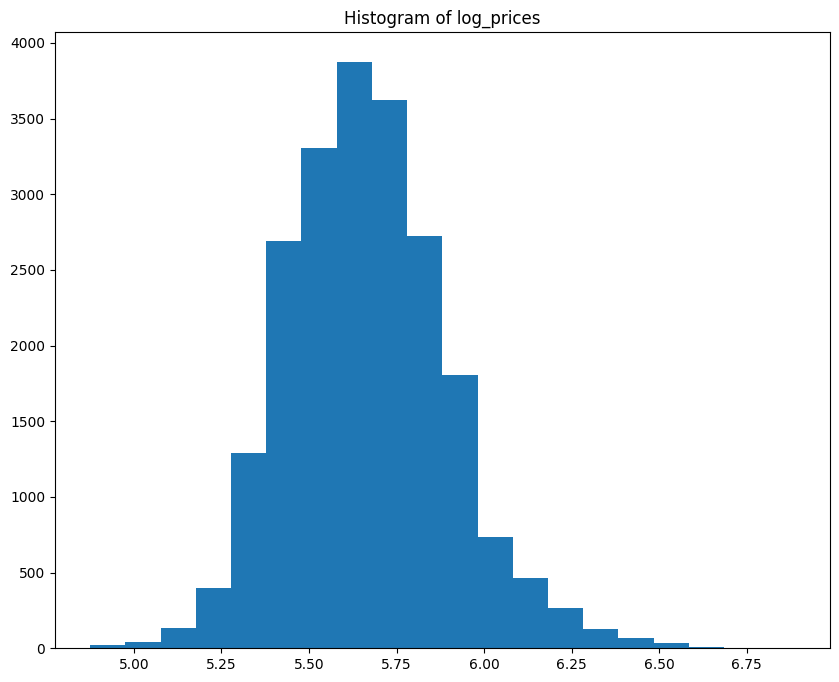

In [79]:
plt.hist(house['log_price'], bins=20)
plt.title("Histogram of log_prices")
plt.show()
